In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [4]:
df = pd.read_csv('Data/train.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
df.drop('id', axis=1, inplace=True) #Drop ID column
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


<AxesSubplot:>

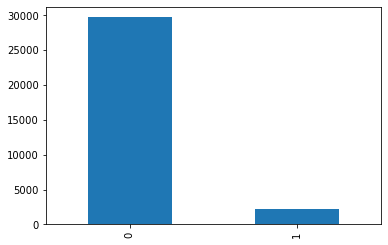

In [31]:
# Check the number of unique values in the label.
df['label'].value_counts().plot(kind='bar')

## Data Cleaning

In [7]:
def clean(text):
  #Replace all digits with space
  text = re.sub(r"[\d-]",'',text)
  # Remove Unicode characters
  text = re.sub(r'[^\x00-\x7F]+', '',text)
  #Remove retweets
  text = re.sub('user', '', text)
  # Remove urls
  text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
  text = re.sub("[^a-zA-Z]", ' ',text)
  # Remove mentions:
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  return text

df.tweet = df.tweet.apply(clean)

In [8]:
df

,label,tweet
0,0,when a father is dysfunctional and is so se...
1,0,thanks for lyft credit i can t use cause ...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ...
4,0,factsguide society now motivation
...,...,...
31957,0,ate isz that youuu
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary ws...


## Word Tokenization

In [9]:
import nltk
from nltk.tokenize import word_tokenize

In [10]:
tokenized_tweet = df["tweet"].apply(lambda x: word_tokenize(x))

In [11]:
tokenized_tweet

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, lyft, credit, i, can, t, use, ca...
2                                  [bihday, your, majesty]
3        [model, i, love, u, take, with, u, all, the, t...
4                   [factsguide, society, now, motivation]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [sikh, temple, vandalised, in, in, calgary, ws...
31961                       [thank, you, for, you, follow]
Name: tweet, Length: 31962, dtype: object

In [12]:
df['tokenized'] = tokenized_tweet

## Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer

In [14]:
def lemma(text_list):
  lemmas = []
  for item in text_list:
    lemma = WordNetLemmatizer().lemmatize(item)
    lemmas.append(lemma)
   
  return lemmas

In [15]:
lemmatized_tweet = df["tokenized"].apply(lambda x: lemma(x))

In [34]:
df['lemmatized'] = lemmatized_tweet

In [35]:
df['lemmatized']

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, lyft, credit, i, can, t, use, ca...
2                                  [bihday, your, majesty]
3        [model, i, love, u, take, with, u, all, the, t...
4                   [factsguide, society, now, motivation]
                               ...                        
31957                              [ate, isz, that, youuu]
31958    [to, see, nina, turner, on, the, airwave, tryi...
31959    [listening, to, sad, song, on, a, monday, morn...
31960    [sikh, temple, vandalised, in, in, calgary, ws...
31961                       [thank, you, for, you, follow]
Name: lemmatized, Length: 31962, dtype: object

## Remove Stopwords

In [19]:
from nltk.corpus import stopwords

In [20]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ReDI_NRW_765\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [36]:
df['lemmatized'] = df['lemmatized'].apply(lambda x: [item for item in x if item not in stop_words])

In [23]:
df.head()

,label,tweet,tokenized,lemmatized
0,0,when a father is dysfunctional and is so se...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drag, kid, dy..."
1,0,thanks for lyft credit i can t use cause ...,"[thanks, for, lyft, credit, i, can, t, use, ca...","[thanks, lyft, credit, use, cause, offer, whee..."
2,0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]"
3,0,model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur]"
4,0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"


In [24]:
df.isna().sum()

label         0
tweet         0
tokenized     0
lemmatized    0
dtype: int64

In [ ]:
df = df.drop(["tweet", "tokenized"], axis = 1)
df.head()

In [28]:
def join_words(list_words):  #Detokenize tweets to be compatible with model
  return " ".join(list_words)


df['sentences'] = df.lemmatized.apply(join_words)

In [29]:
df = df.drop(["lemmatized"], axis = 1)
df.head()

,label,sentences
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation


In [39]:
from nltk.tokenize import sent_tokenize

In [40]:
tokenized_sentences = df["sentences"].apply(lambda x: sent_tokenize(x))

In [41]:
df['tokenized_sentences'] = tokenized_sentences

In [42]:
df

,label,sentences,lemmatized,tokenized_sentences
0,0,father dysfunctional selfish drag kid dysfunct...,"[father, dysfunctional, selfish, drag, kid, dy...",[father dysfunctional selfish drag kid dysfunc...
1,0,thanks lyft credit use cause offer wheelchair ...,"[thanks, lyft, credit, use, cause, offer, whee...",[thanks lyft credit use cause offer wheelchair...
2,0,bihday majesty,"[bihday, majesty]",[bihday majesty]
3,0,model love u take u time ur,"[model, love, u, take, u, time, ur]",[model love u take u time ur]
4,0,factsguide society motivation,"[factsguide, society, motivation]",[factsguide society motivation]
...,...,...,...,...
31957,0,ate isz youuu,"[ate, isz, youuu]",[ate isz youuu]
31958,0,see nina turner airwave trying wrap mantle gen...,"[see, nina, turner, airwave, trying, wrap, man...",[see nina turner airwave trying wrap mantle ge...
31959,0,listening sad song monday morning otw work sad,"[listening, sad, song, monday, morning, otw, w...",[listening sad song monday morning otw work sad]
31960,1,sikh temple vandalised calgary wso condemns act,"[sikh, temple, vandalised, calgary, wso, conde...",[sikh temple vandalised calgary wso condemns act]


In [43]:
df.to_csv('Data/cleaned_data.csv', index=False)